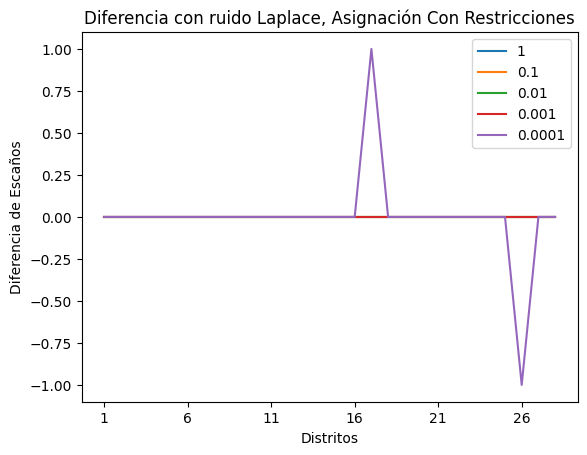

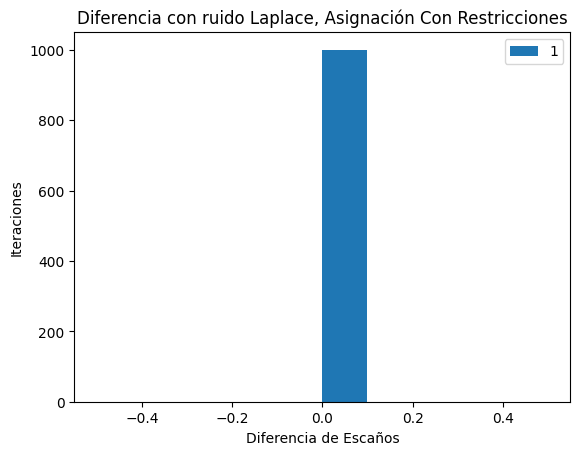

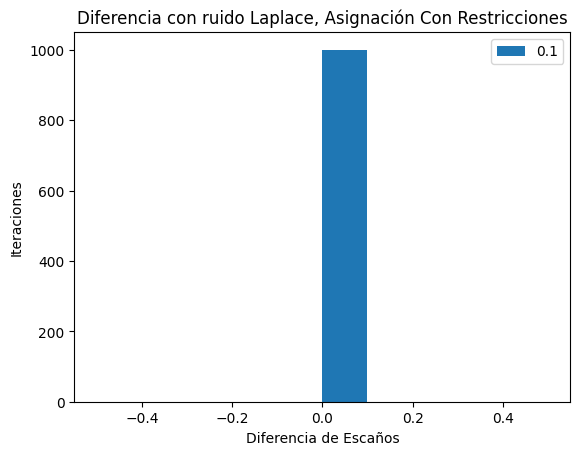

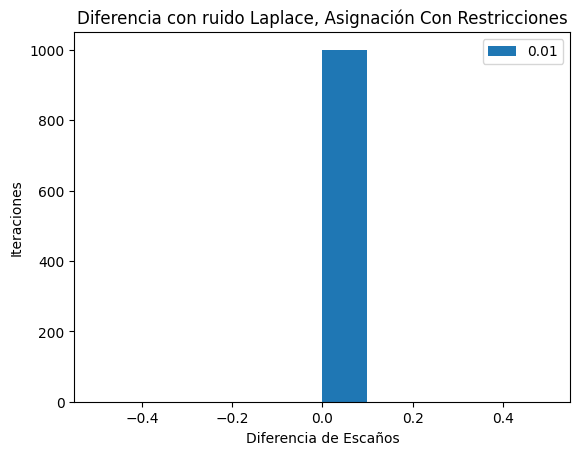

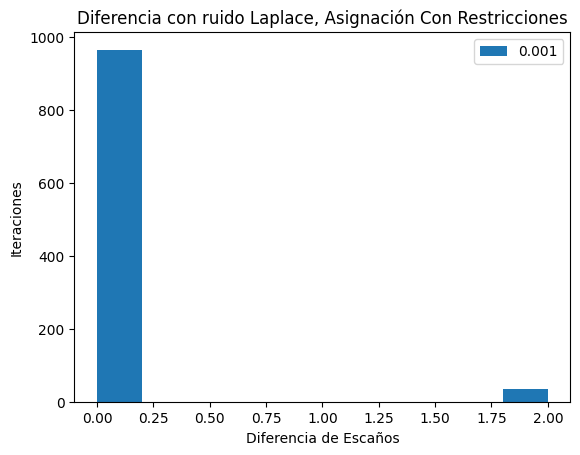

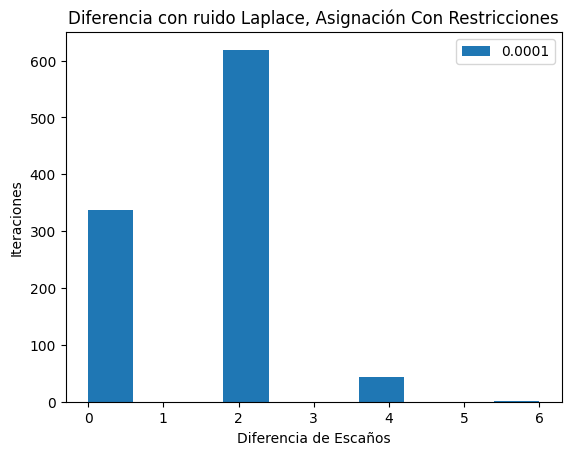

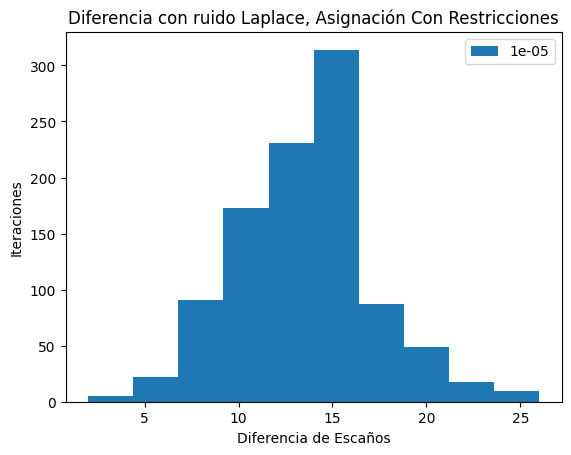

In [49]:
import pandas as pd
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt






def vectorial_laplace_mech(vector, scale):
    Y=[]
    for i in range(len(vector)):
        Y.append(np.random.laplace(loc=0,scale=1/scale))
    suma=np.array(vector)+np.array(Y)
    return suma

def vectorial_gaussian_mech(vector, epsilon, delta):
    Y=[]
    for i in range(len(vector)):
        Y.append(np.random.normal(loc=0,scale=(np.sqrt(2*np.log(2/delta))/epsilon),size=None))
    suma=np.array(vector)+np.array(Y)
    return suma

def signpost(h):
    s=[]
    for i in range(h):
        s.append(i+1)
    return s

def v_max(P):
    m=0
    j=0
    for i in range(len(P)):
        if float(P[i])>=m:
            m=P[i]
            j=i
    v=[m,j]
    return v

def Asignacion(P,h):
    q=[]
    n=[]
    for i in range(len(P)):
        q.append(P[i])
        n.append(1)
    while sum(n)<h:
        for j in range(len(P)):
            if q[j]==max(q)and sum(n)<h:
                n[j]+=1
                q[j]=P[j]/signpost(h)[n[j]]
    return n

def AsignacionConRestricciones(P,h):
    q=[]
    n=[]
    for i in range(len(P)):
        n.append(3)
        q.append(P[i]/signpost(h)[n[i]])
    while sum(n)<h:
        for j in range(len(P)):
            if q[j]==max(q) and sum(n)<h:
                n[j]+=1
                q[j]=P[j]/signpost(h)[n[j]]
                if n[j]==8:
                  q[j]=0
    return n

P=[235081,328782,613328,308247,759228,950069,858231,1423730,1019773,1077440,814374,1238375,734821,920068,535375,375202,705103,330490,531915,1005782,562797,304212,679287,401548,336773,497941,107334,163748]
P_lap=vectorial_laplace_mech(P, 1)
P_gau=vectorial_gaussian_mech(P, 1000, 0.001)

E=[3,3,5,5,7,8,8,8,7,8,6,7,5,6,5,4,7,4,5,8,5,4,7,5,4,5,3,3]

#print(Asignacion(P,155))
#print(sum(Asignacion(P,155)))
#print(AsignacionConRestricciones(P,155))
#print(sum(AsignacionConRestricciones(P,155)))

d=['Distritos']
for i in range(28):
  d.append(i+1)
data=[d]

def EscañosRealesVSAsignacion(Escaños,P,h,data):
  distritos=data
  v=np.array(Escaños)
  reales=['Escaños Reales']
  for j in range(len(v)):
      reales.append(int(v[j]))
  v=np.array(Asignacion(P,h))
  asignacion=['Asignación Sin Restricción']
  for j in range(len(v)):
      asignacion.append(int(v[j]))
  data.append(reales)
  data.append(asignacion)
  data=np.transpose(np.array(data))
  df = pd.DataFrame(data=data[1:,1:],index=data[1:,0],columns=data[0,1:])
  df=df.astype(float)
  plot= df.plot.bar(title="Diferencia Asignación Real",xlabel='Distritos' ,ylabel='Cantidad de Escaños')
  return plot

def EscañosRealesVSAsignacionConRestriccion(Escaños,P,h,data):
  distritos=data
  v=np.array(Escaños)
  reales=['Escaños Reales']
  for j in range(len(v)):
      reales.append(int(v[j]))
  v=np.array(AsignacionConRestricciones(P,h))
  asignacion=['Asignación Con Restricción']
  for j in range(len(v)):
      asignacion.append(int(v[j]))
  data.append(reales)
  data.append(asignacion)
  data=np.transpose(np.array(data))
  df = pd.DataFrame(data=data[1:,1:],index=data[1:,0],columns=data[0,1:])
  df=df.astype(float)
  plot= df.plot.bar(title="Diferencia Asignación Real",xlabel='Distritos' ,ylabel='Cantidad de Escaños')
  return plot

def DifEscañosLaplace(P,h,data):
  distritos=data
  for i in range(1):
      epsilon=10**(-10)
      diferencia=[epsilon]
      P_lap=vectorial_laplace_mech(P, epsilon)
      v=np.array(Asignacion(P,h))-np.array(Asignacion(P_lap,h))
      for j in range(len(v)):
        diferencia.append(int(v[j]))
      data.append(diferencia)
      L=[]
      if max(v)==min(v)==0:
        for j in range(1,10):
          L.append(j)
      else:
        for j in range(1,max(v)):
          L.append(j)
      #print(v)
      plt.hist(x=v,bins=L)
  #data=np.transpose(np.array(data))
  #df = pd.DataFrame(data=data[1:,1:],index=data[1:,0],columns=data[0,1:])
  #df=df.astype(float)
  #plot= df.plot.hist(by=, title="Diferencia con ruido Laplace, Asignación Estándar",xlabel='Distritos' ,ylabel='Diferencia de Escaños')
  return plt.show()

def DifEscañosNormal(P,h,data):
  for i in range(5):
      epsilon=10**(-i)
      diferencia=[epsilon]
      delta=len(P)**2
      P_norm=vectorial_gaussian_mech(P, epsilon,delta)
      v=np.array(Asignacion(P,h))-np.array(Asignacion(P_norm,h))
      for j in range(len(v)):
        diferencia.append(int(v[j]))
      data.append(diferencia)
  data=np.transpose(np.array(data))
  df = pd.DataFrame(data=data[1:,1:],index=data[1:,0],columns=data[0,1:])
  df=df.astype(float)
  plot= df.plot(title="Diferencia con ruido Normal (d=0.001), Asignación Estándar",xlabel='Distritos' ,ylabel='Diferencia de Escaños')
  return plot

def DifEscañosLaplaceConRestricciones(P,h,data):
  for i in range(5):
      epsilon=10**(-i)
      diferencia=[epsilon]
      P_lap=vectorial_laplace_mech(P, epsilon)
      v=np.array(AsignacionConRestricciones(P,h))-np.array(AsignacionConRestricciones(P_lap,h))
      for j in range(len(v)):
        diferencia.append(int(v[j]))
      data.append(diferencia)
  data=np.transpose(np.array(data))
  df = pd.DataFrame(data=data[1:,1:],index=data[1:,0],columns=data[0,1:])
  df=df.astype(float)
  plot= df.plot(title="Diferencia con ruido Laplace, Asignación Con Restricciones",xlabel='Distritos' ,ylabel='Diferencia de Escaños')
  return plot

def HistLaplaceConRestricciones(P,h,epsilon):
    datos=[]
    iteracion=[]
    diferencia=[epsilon]
    for j in range(1000):
      P_lap=vectorial_laplace_mech(P, epsilon)
      v=np.array(AsignacionConRestricciones(P,h))-np.array(AsignacionConRestricciones(P_lap,h))
      for k in range(len(v)):
        v[k]=abs(v[k])
      diferencia.append(sum(v))
      iteracion.append(str(j))
    datos.append(diferencia)
    datos=np.transpose(np.array(datos))
    df = pd.DataFrame(data=datos[1:,0:],index=iteracion,columns=[epsilon])
    #df=df.astype(float)
    plot= df.plot(title="Diferencia con ruido Laplace, Asignación Con Restricciones",xlabel='Diferencia de Escaños' ,ylabel='Iteraciones',kind='hist')
    return plot

def DifEscañosNormalConRestricciones(P,h,data):
  for i in range(5):
      epsilon=10**(-i)
      diferencia=[epsilon]
      delta=len(P)**2
      P_norm=vectorial_gaussian_mech(P, epsilon,delta)
      v=np.array(AsignacionConRestricciones(P,h))-np.array(AsignacionConRestricciones(P_norm,h))
      for j in range(len(v)):
        diferencia.append(int(v[j]))
      data.append(diferencia)
  data=np.transpose(np.array(data))
  df = pd.DataFrame(data=data[1:,1:],index=data[1:,0],columns=data[0,1:])
  df=df.astype(float)
  plot= df.plot(title="Diferencia con ruido Normal (d=0.001), Asignación Con Restricciones",xlabel='Distritos' ,ylabel='Diferencia de Escaños')
  return plot


#DifEscañosLaplace(P,155,data)
#DifEscañosNormal(P,155,data)

DifEscañosLaplaceConRestricciones(P,155,data)
#DifEscañosNormalConRestricciones(P,155,data)

#EscañosRealesVSAsignacion(E,P,155,data)
#EscañosRealesVSAsignacionConRestriccion(E,P,155,data)

for i in range(5):
  HistLaplaceConRestricciones(P,155,10**(-i))



